<a href="https://colab.research.google.com/github/tempzeba/iot_test_public/blob/main/A1L02007_log_20201120_(DNN_tensorflow2_0)_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) 程式說明
### 目的：A1L02007 IOT異常分析
### 運行環境：

In [13]:
import sys
print("python版本:%s"% sys.version)

python版本:3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [14]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('max_row',500)

In [15]:

# try:
#     from urllib.request import urlopen
# except ImportError:
#     from urllib2 import urlopen

from urllib.request import urlopen
from io import BytesIO
import zipfile

import pandas as pd

# Dictionary holding all the dataframes from all zip/zip/csvs
df_train = pd.DataFrame()


def zip_to_dfs(data):
    global df_train
    zip_file = zipfile.ZipFile(BytesIO(data))

    for name in zip_file.namelist():
        if name.lower().endswith('.csv'):
            df_train = df_train.append(pd.read_csv(zip_file.open(name), sep='\t'))
        elif name.lower().endswith('.zip'):
            zip_to_dfs(zip_file.open(name).read())
        # print(dfs)


def get_zip_data_from_url(url):
    req = urlopen(url)
    zip_to_dfs(req.read())


final_links_list = [
    'https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02007_202009.zip']

for link in final_links_list:
    print(link)
    get_zip_data_from_url(link)

# Display the first couple of dataframes    
# for name, df in sorted(dfs.items())[:2]:
#     print('\n', name, '\n')
#     print(df)

# print(dfs)

https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02007_202009.zip


## 1) 載入資料集

In [16]:
# df_train = pd.read_csv('./data/Iris.csv')
# df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02007_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[ 
r'收集日期',
r'抽樣秒',
r'位址區段B0紀錄時間',
r'位址區段W10紀錄時間',
r'位址區段W1200紀錄時間',
r'位址區段W200紀錄時間',
r'位址區段W2004紀錄時間'
,
 'A001. 空壓源SN#1異常',
 'A010. 真空源SN#1異常',
 'A020. EMO觸發異常',
 'A030. CPU異常',
 'A031. RD77MS16模組異常',
 'A032. RS-485模組異常',
 'A033. R64AD模組異常',
 'A050. CPU電池 電力低下',
 'A051. PLC保險絲燒毀',
 'A052. PLC偵測 AC/DC 電力低下',
 'A100. 轉塔伺服R軸異常',
 'A101. 真空鼓R軸伺服異常',
 'A102. 刀鼓R軸伺服異常',
 'A103. 旋轉刀R軸伺服異常',
 'A104. 轉瓶01伺服R軸異常',
 'A105. 送標伺服R軸異常',
 'A106. 螺桿01伺服R軸異常',
 'A107. 膠鼓伺服R軸伺服異常',
 'A108. 標捲A伺服R軸異常',
 'A109. 標捲B伺服R軸異常',
 'A110. 轉塔伺服Z軸異常',
 'A111. 貼標主機伺服Z軸異常',
 'A112. 貼標主機伺服Y軸異常',
 'A113. 虛擬軸01伺服R軸異常',
 'A114. 螺桿02伺服R軸異常',
 'A115. 轉瓶02伺服R軸異常',
 'A116. 轉瓶03伺服R軸異常',
 'A117. 轉瓶04伺服R軸異常',
 'A118. 轉瓶05伺服R軸異常',
 'A119. 轉瓶06伺服R軸異常',
 'A120. 轉瓶07伺服R軸異常',
 'A121. 轉瓶08伺服R軸異常',
 'A122. 轉瓶09伺服R軸異常',
 'A123. 轉瓶10伺服R軸異常',
 'A124. 轉瓶11伺服R軸異常',
 'A125. 轉瓶12伺服R軸異常',
 'A126. 轉瓶13伺服R軸異常',
 'A127. 轉瓶14伺服R軸異常',
 'A128. 轉瓶15伺服R軸異常',
 'A129. 轉瓶16伺服R軸異常',
 'A130. 轉瓶17伺服R軸異常',
 'A131. 轉瓶18伺服R軸異常',
 'A321. 操作側01門檢異常',
 'A322. 操作側02門檢異常',
 'A323. 維修側01門檢異常',
 'A324. 維修側02門檢異常',
 'A330.轉刀Index Sensor異常',
 'A331.標籤MarkSensor異常',
 'A340. 標籤斷標異常',
 'A345. 張力位置不正確',
 'A350. 入料星盤跳齒異常',
 'A351. 出料星盤跳齒異常',
 'A360. 真空標籤檢查異常',
 'A361. 真空鼓沾膠標籤檢查異常',
 'A362. 真空鼓漏貼標籤檢查異常',
 'A364. 螺桿進瓶異常',
 'A365. 進瓶甩瓶檢查異常',
 'A366. 貼標甩瓶檢查異常',
 'A367. 出瓶甩瓶檢查異常',
 'A370. 倒瓶偵測異常',
 'A371. 標籤切斷位置不正確',
 'A380. Roll Fed變頻器異常',
 'A381. Vacuum變頻器異常',
 'A382. 膠泵變頻器異常',
 'A383. 主輸送帶變頻器異常',
 'A390. 膠鼓加熱器斷線異常',
 'A391. 膠桶加熱器斷線異常',
 'A392. 出膠板加熱器斷線異常',
 'A393. 刮膠板加熱器斷線異常',
 'A394. 盛料盤加熱器斷線異常',
 'A395. 膠管加熱器斷線異常',
 'A401. 轉塔伺服R軸未設原點',
 'A402. 真空鼓伺服R軸未設原點',
 'A403. 刀鼓伺服R軸未設原點',
 'A404. 旋轉刀伺服R軸未設原點',
 'A405. 轉瓶01伺服R軸未設原點',
 'A406. 送標伺服R軸未設原點',
 'A407. 螺桿01伺服R軸未設原點',
 'A408. 膠鼓伺服R軸未設原點',
 'A409. 標捲A伺服R軸未設原點',
 'A410. 標捲B伺服R軸未設原點',
 'A411. 轉塔伺服Z軸未設原點',
 'A412. 貼標主機伺服Z軸未設原點',
 'A413. 貼標主機伺服Y軸未設原點',
 'A414. 虛擬軸01伺服R軸未設原點',
 'A415. 螺桿02伺服R軸未設原點',
 'A416. 轉瓶02伺服R軸未設原點',
 'A417. 轉瓶03伺服R軸未設原點',
 'A418. 轉瓶04伺服R軸未設原點',
 'A419. 轉瓶05伺服R軸未設原點',
 'A420. 轉瓶06伺服R軸未設原點',
 'A421. 轉瓶07伺服R軸未設原點',
 'A422. 轉瓶08伺服R軸未設原點',
 'A423. 轉瓶09伺服R軸未設原點',
 'A424. 轉瓶10伺服R軸未設原點',
 'A425. 轉瓶11伺服R軸未設原點',
 'A426. 轉瓶12伺服R軸未設原點',
 'A427. 轉瓶13伺服R軸未設原點',
 'A428. 轉瓶14伺服R軸未設原點',
 'A429. 轉瓶15伺服R軸未設原點',
 'A430. 轉瓶16伺服R軸未設原點',
 'A431. 轉瓶17伺服R軸未設原點',
 'A432. 轉瓶18伺服R軸未設原點',
 'A455. 標簽長度設定錯誤',
 'A456.ARC-Mark不正確',
 'A460. 電控箱冷氣異常',
 '轉塔伺服R軸單元老化預警',
 '真空鼓伺服R軸單元老化預警',
 '刀鼓伺服R軸單元老化預警',
 '旋轉刀伺服R軸單元老化預警',
 '轉瓶01伺服R軸單元老化預警',
 '送標伺服R軸單元老化預警',
 '螺桿01伺服R軸單元老化預警',
 '膠鼓伺服R軸單元老化預警',
 '標捲A伺服R軸單元老化預警',
 '標捲B伺服R軸單元老化預警',
 '轉塔伺服Z軸單元老化預警',
 '貼標主機伺服Z軸單元老化預警',
 '貼標主機伺服Y軸單元老化預警',
 '保留軸單元老化預警',
 '螺桿02伺服R軸單元老化預警',
 '轉瓶02伺服R軸單元老化預警',
 '轉瓶03伺服R軸單元老化預警',
 '轉瓶04伺服R軸單元老化預警',
 '轉瓶05伺服R軸單元老化預警',
 '轉瓶06伺服R軸單元老化預警',
 '轉瓶07伺服R軸單元老化預警',
 '轉瓶08伺服R軸單元老化預警',
 '轉瓶09伺服R軸單元老化預警',
 '轉瓶10伺服R軸單元老化預警',
 '轉瓶11伺服R軸單元老化預警',
 '轉瓶12伺服R軸單元老化預警',
 '轉瓶13伺服R軸單元老化預警',
 '轉瓶14伺服R軸單元老化預警',
 '轉瓶15伺服R軸單元老化預警',
 '轉瓶16伺服R軸單元老化預警',
 '轉瓶17伺服R軸單元老化預警',
 '轉瓶18伺服R軸單元老化預警'

],axis=1) 

df_train = df_train[df_train['ALife(PLC)']>=0]  #清除無效數據
df_train = df_train[df_train['ALife(PLC)']<65536]  #清除無效數據
df_train.describe().transpose()
# df_train.columns.to_list()

# 調整資料集
# 1. 只取有異常部分
# 2. 計算有異常資料筆數
# 3. 從無異常資料隨機抽出k筆資料與異常資料合併作為投入模型的資料集。k=異常資料筆數
mask = df_train[r'故障代號'] > 0
target_count = mask.sum()
# print(target_count)
df_train_noerr = df_train[df_train[r'故障代號'] == 0].sample(n=target_count,random_state=123,axis=0)
df_train = df_train[mask]
df_train = df_train.append(df_train_noerr)
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
手動模式,18422.0,4.297036e-01,4.950472e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
保留,18422.0,3.256975e-04,1.804464e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
初始化中,18422.0,1.791336e-03,4.228741e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
初始化完成,18422.0,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
保留模式,18422.0,3.768320e-01,4.846054e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
暫停模式,18422.0,1.913473e-01,3.933725e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
標籤捲A使用中,18422.0,4.306264e-01,4.951774e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
標籤捲B使用中,18422.0,3.507762e-01,4.772260e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
No Alarm,18422.0,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
機台狀態,18422.0,2.411160e+05,2.103304e+07,1.00000,3.000000e+00,4.000000e+00,5.000000e+00,2.011447e+09


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

### 註：
略。(IOT原始資料已經一次前處理)

## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。
### 註：
略。(IOT原始資料已經一次前處理)

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？

In [17]:
# from tensorflow.keras.utils import to_categorical
# y = to_categorical(df_train[r'故障代號'])
y = df_train[r'故障代號']

## 5) 切割訓練集與測試集

In [18]:
pd.set_option('max_row',500)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'故障代號'])
# X.isna().sum().sum()
# X
mask = X.describe().transpose()['std']==0
X.describe().transpose()[mask].index.tolist()
# X.describe().transpose().columns.tolist()


['初始化完成',
 'No Alarm',
 '現用瓶子高度',
 '現用瓶子直徑',
 '現用標籤寬度',
 '現用送標啟動補償值',
 '現用智能切標功能',
 '現用沾膠位置補償',
 'Ax.005警報碼',
 'Ax.006警報碼',
 'Ax.008警報碼',
 'Ax.011異常碼',
 'Ax.013異常碼',
 'Ax.016警報碼',
 'Ax.017警報碼',
 'Ax.018警報碼',
 'Ax.022警報碼',
 'Ax.023警報碼',
 'Ax.024警報碼',
 'Ax.025警報碼',
 'Ax.026警報碼',
 'Ax.027警報碼',
 'Ax.028警報碼',
 'Ax.029警報碼',
 'Ax.030警報碼',
 'Ax.031警報碼',
 'Ax.032警報碼']

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [20]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
# X_train

訓練資料:  (12895, 231)
測試資料:  (5527, 231)


## 6) 建立網路模型

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [22]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(1251, Activation('softmax')))

In [23]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 1856      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 1251)              21267     
Total params: 23,267
Trainable params: 23,267
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1000
epochs = 50

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/50
12/12 [==============================] - 0s 33ms/step - loss: 2.0034 - acc: 0.4981 - val_loss: 6.4330 - val_acc: 0.4992
Epoch 2/50
12/12 [==============================] - 0s 25ms/step - loss: 1.8871 - acc: 0.4981 - val_loss: 4.2711 - val_acc: 0.4992
Epoch 3/50
12/12 [==============================] - 0s 26ms/step - loss: 1.9606 - acc: 0.4982 - val_loss: 3.7417 - val_acc: 0.4992
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 1.9112 - acc: 0.4979 - val_loss: 3.8829 - val_acc: 0.4992
Epoch 5/50
12/12 [==============================] - 0s 26ms/step - loss: 1.8357 - acc: 0.4981 - val_loss: 3.5837 - val_acc: 0.4992
Epoch 6/50
12/12 [==============================] - 0s 25ms/step - loss: 1.8356 - acc: 0.4981 - val_loss: 3.5144 - val_acc: 0.4992
Epoch 7/50
12/12 [==============================] - 0s 25ms/step - loss: 1.8358 - acc: 0.4981 - val_loss: 3.5273 - val_acc: 0.4992
Epoch 8/50
12/12 [==============================] - 0s 26ms/step - loss: 1.8356 - a

## 7) 觀察訓練結果

In [26]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

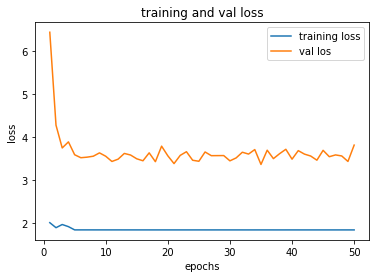

In [27]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

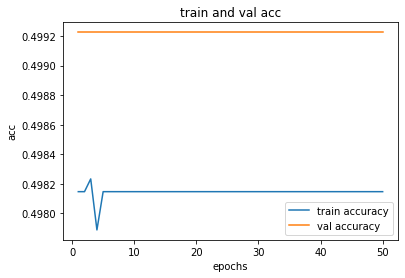

In [28]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 8) 測試

In [29]:
from sklearn.metrics import accuracy_score
label=y
pred =  np.argmax(model.predict(X), axis=1)
# print(pred.shape)
print(accuracy_score(label, pred))
# print(y)

0.5


In [30]:
!pip install eli5

     |████████████████████████████████| 112kB 3.6MB/s 


## 9) 檢查特徵重要性
> https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
> https://www.mdeditor.tw/pl/pgi5/zh-tw

> 針對BlackBox模型或非sklearn模型，使用排列重要性方法


> 捨棄重要性低、增加損失的features特徵，重新建模訓練。


> 














In [31]:
# import numpy as np
from eli5.permutation_importance import get_score_importances

# ... load data, define score function
def score(X, y):
    y_pred = np.argmax(model.predict(X), axis=1)
    return accuracy_score(y, y_pred)

lab=y_train
base_score, score_decreases = get_score_importances(score, X_train.values, lab)
feature_importances = np.mean(score_decreases, axis=0)



In [32]:
# print(feature_importances)
feature_importance_dict = {}
for i, feature_name in list(enumerate(X.columns.values.tolist())) :
	feature_importance_dict[feature_name]=feature_importances[i]

# print(dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True)[:5]))
sorted_fi = dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True))
for name,i in sorted_fi.items():
  print('{0:.8f}'.format(i),'\t',name)


0.00086855 	 Ax.003馬達轉速0.01r/min
0.00085304 	 Ax.008馬達轉速0.01r/min
0.00068244 	 Ax.028馬達轉速0.01r/min
0.00015510 	 Ax.012馬達轉速0.01r/min
0.00012408 	 Ax.013馬達轉速0.01r/min
0.00012408 	 Ax.014馬達轉速0.01r/min
0.00007755 	 機台狀態
0.00007755 	 Ax.019馬達轉速0.01r/min
0.00007755 	 Ax.032馬達轉速0.01r/min
0.00007755 	 機台貼標數量
0.00006204 	 Ax.016馬達轉速0.01r/min
0.00006204 	 Ax.018馬達轉速0.01r/min
0.00004653 	 Ax.024馬達轉速0.01r/min
0.00004653 	 Ax.017馬達轉速0.01r/min
0.00004653 	 Ax.023馬達轉速0.01r/min
0.00004653 	 Ax.026馬達轉速0.01r/min
0.00004653 	 Ax.029馬達轉速0.01r/min
0.00003102 	 Ax.001馬達轉速0.01r/min
0.00003102 	 Ax.004馬達轉速0.01r/min
0.00003102 	 Ax.009馬達轉速0.01r/min
0.00003102 	 Ax.020馬達轉速0.01r/min
0.00003102 	 Ax.025馬達轉速0.01r/min
0.00001551 	 Ax.007馬達轉速0.01r/min
0.00001551 	 Ax.011馬達轉速0.01r/min
0.00001551 	 Ax.015馬達轉速0.01r/min
0.00001551 	 Ax.021馬達轉速0.01r/min
0.00001551 	 Ax.022馬達轉速0.01r/min
0.00001551 	 Ax.031馬達轉速0.01r/min
0.00000000 	 手動模式
0.00000000 	 保留
0.00000000 	 初始化中
0.00000000 	 初始化完成
0.00000000 	 保留模式
0.00000000 	 暫停